In [1]:
import os
import glob
import time

!pip install librosa
import librosa
import numpy as np
!pip install pretty_midi
import pretty_midi
import librosa.display
!pip install scipy
from scipy.io import wavfile
!pip install pypianoroll
import pypianoroll
from scipy.signal import hilbert
from scipy.ndimage import median_filter
import matplotlib.pyplot as plt

# !pip install mpld3
# import mpld3
# from mpld3 import plugins

print("end of cell")

end of cell


In [2]:
# from google.colab import drive

# print(os.getcwd())
# print(os.listdir())
# drive.mount('/content/drive/', force_remount=True)

# # change path if necessary
# os.chdir("/content/drive/My Drive/research/MIDIconversion_marovany")
# print(os.getcwd())

os.chdir("C:/Users/admin/Project/MIDIconversion_marovany/capteurs/")
print('Working dir : ', os.getcwd())

Working dir :  C:\Users\admin\Project\MIDIconversion_marovany\capteurs


In [3]:
def create_note_list():
    note_letters = ['E','D','B','G']
    note_numbers = range(10)
    note_commas = ['', '#']
    note_names = []
    for nl in note_letters:
        for nn in note_numbers:
            for nc in note_commas:
                note_names.append(nl + str(nn) + nc)
    return note_names

def get_note_guessed_from_fname(note_list: list, fname: str):
    """Extract MIDI note name based on wav filename. 
    Note name should be in the filename

    Args:
        note_list (list[str]): List of every possible notes as strings
        fname (str): name of wav file

    Returns:
        int or None: note number in midi format or None if note name was not in file name
    """
    midi_note = None
    for note_candidate in note_list:
        if note_candidate in fname:
            midi_note = pretty_midi.note_name_to_number(note_candidate)
            break
    return midi_note

def get_amplitude_envelope(y: np.ndarray, filter_timescale: int):
    """ Extract signal envelop, median filter it and normalize by max

    Args:
        y (_type_): _description_

    Returns:
        np.ndarray: amplitude_envelope
    """
    analytic_signal = hilbert(y)
    amplitude_envelope = np.abs(analytic_signal)  
    amplitude_envelope = median_filter(amplitude_envelope, filter_timescale)
    amplitude_envelope = amplitude_envelope / max(amplitude_envelope)
    return amplitude_envelope

def get_decal(amplitude_envelope: np.ndarray, threshold: float):
    """
    Args:
        amplitude_envelope (np.ndarray): _description_
        threshold (float): _description_
    Returns:
        np.ndarray: decal
    """
    new_binary = np.zeros(len(y))
    new_binary[amplitude_envelope > threshold] = 1
    decal = new_binary[1:] - new_binary[0:-1]
    return decal

def get_time_series_fig(fig_size: list, y: np.ndarray, samp_rate):
    # plt.rcParams['figure.figsize'] = fig_size
    fig, ax = plt.subplots()
    fig.set(figwidth=fig_size[0], figheight=fig_size[1],tight_layout=True)
    ax.plot(np.linspace(0, len(y)/samp_rate, len(y)), y)
    ax.autoscale(enable=True, axis='x', tight=True)
    return fig

def get_pitch_detection_fig(fig_size: list, ampl_envel: np.ndarray, threshold:float, min_duration: float, instru: pretty_midi.Instrument, decal: np.ndarray, midi_note: int):
    plt.rcParams['figure.figsize'] = fig_size
    fig, ax = plt.subplots()
    x = np.linspace(0, len(ampl_envel)/sr, len(ampl_envel))
    ax.plot(x, ampl_envel, 'b', linewidth=0.8)
    ax.plot(x, np.linspace(threshold, threshold, len(ampl_envel)), 'k--',linewidth=0.8)

    # loop over events
    for start_ind, end_ind in zip(np.where(decal==1)[0], np.where(decal==-1)[0]):
        if (end_ind - start_ind)/sr > min_duration:
            ax.plot(np.linspace(start_ind, start_ind, 100)/sr, 
                    np.linspace(0, 1, 100), 'g-')
            ax.plot(np.linspace(end_ind, end_ind, 100)/sr, 
                    np.linspace(0, 1, 100), 'r-')
            # Create a Note instance for each note
            note = pretty_midi.Note(velocity=100, pitch=round(midi_note), start=start_ind/sr, end=end_ind/sr)
            add_note_to_instru(note, instru)
    
    fig.set(tight_layout=True)
    # fig.tight_layout()
    return fig

def add_note_to_instru(note: pretty_midi.Note, instru: pretty_midi.Instrument):
    instru.notes.append(note)

def write_midi_file(midi: pretty_midi.PrettyMIDI, fname: str):
    midi.write(fname)
    
def get_multitrack_plot(fname: str):
    print(fname)
    multitrack = pypianoroll.read(fname)
    multitrack_plot = multitrack.plot()
    return multitrack_plot


['C:\\Users\\admin\\Project\\MIDIconversion_marovany\\capteurs\\02-G2-140709_1628.wav', 'C:\\Users\\admin\\Project\\MIDIconversion_marovany\\capteurs\\03-G3-140709_1628.wav', 'C:\\Users\\admin\\Project\\MIDIconversion_marovany\\capteurs\\04-G4-140709_1628.wav', 'C:\\Users\\admin\\Project\\MIDIconversion_marovany\\capteurs\\05-G5-140709_1628.wav', 'C:\\Users\\admin\\Project\\MIDIconversion_marovany\\capteurs\\06-G6-140709_1628.wav', 'C:\\Users\\admin\\Project\\MIDIconversion_marovany\\capteurs\\07-G7-140709_1628.wav', 'C:\\Users\\admin\\Project\\MIDIconversion_marovany\\capteurs\\15-D3-140709_1628.wav', 'C:\\Users\\admin\\Project\\MIDIconversion_marovany\\capteurs\\16-D4-140709_1628.wav', 'C:\\Users\\admin\\Project\\MIDIconversion_marovany\\capteurs\\17-D5-140709_1628.wav', 'C:\\Users\\admin\\Project\\MIDIconversion_marovany\\capteurs\\19-D7-140709_1628.wav', 'C:\\Users\\admin\\Project\\MIDIconversion_marovany\\capteurs\\20-D8-140709_1628.wav', 'C:\\Users\\admin\\Project\\MIDIconversion

C:\Users\admin\AppData\Local\Temp\ipykernel_16236\1974563140.py:35: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, y = wavfile.read(wav_file)


Guessed note : 43


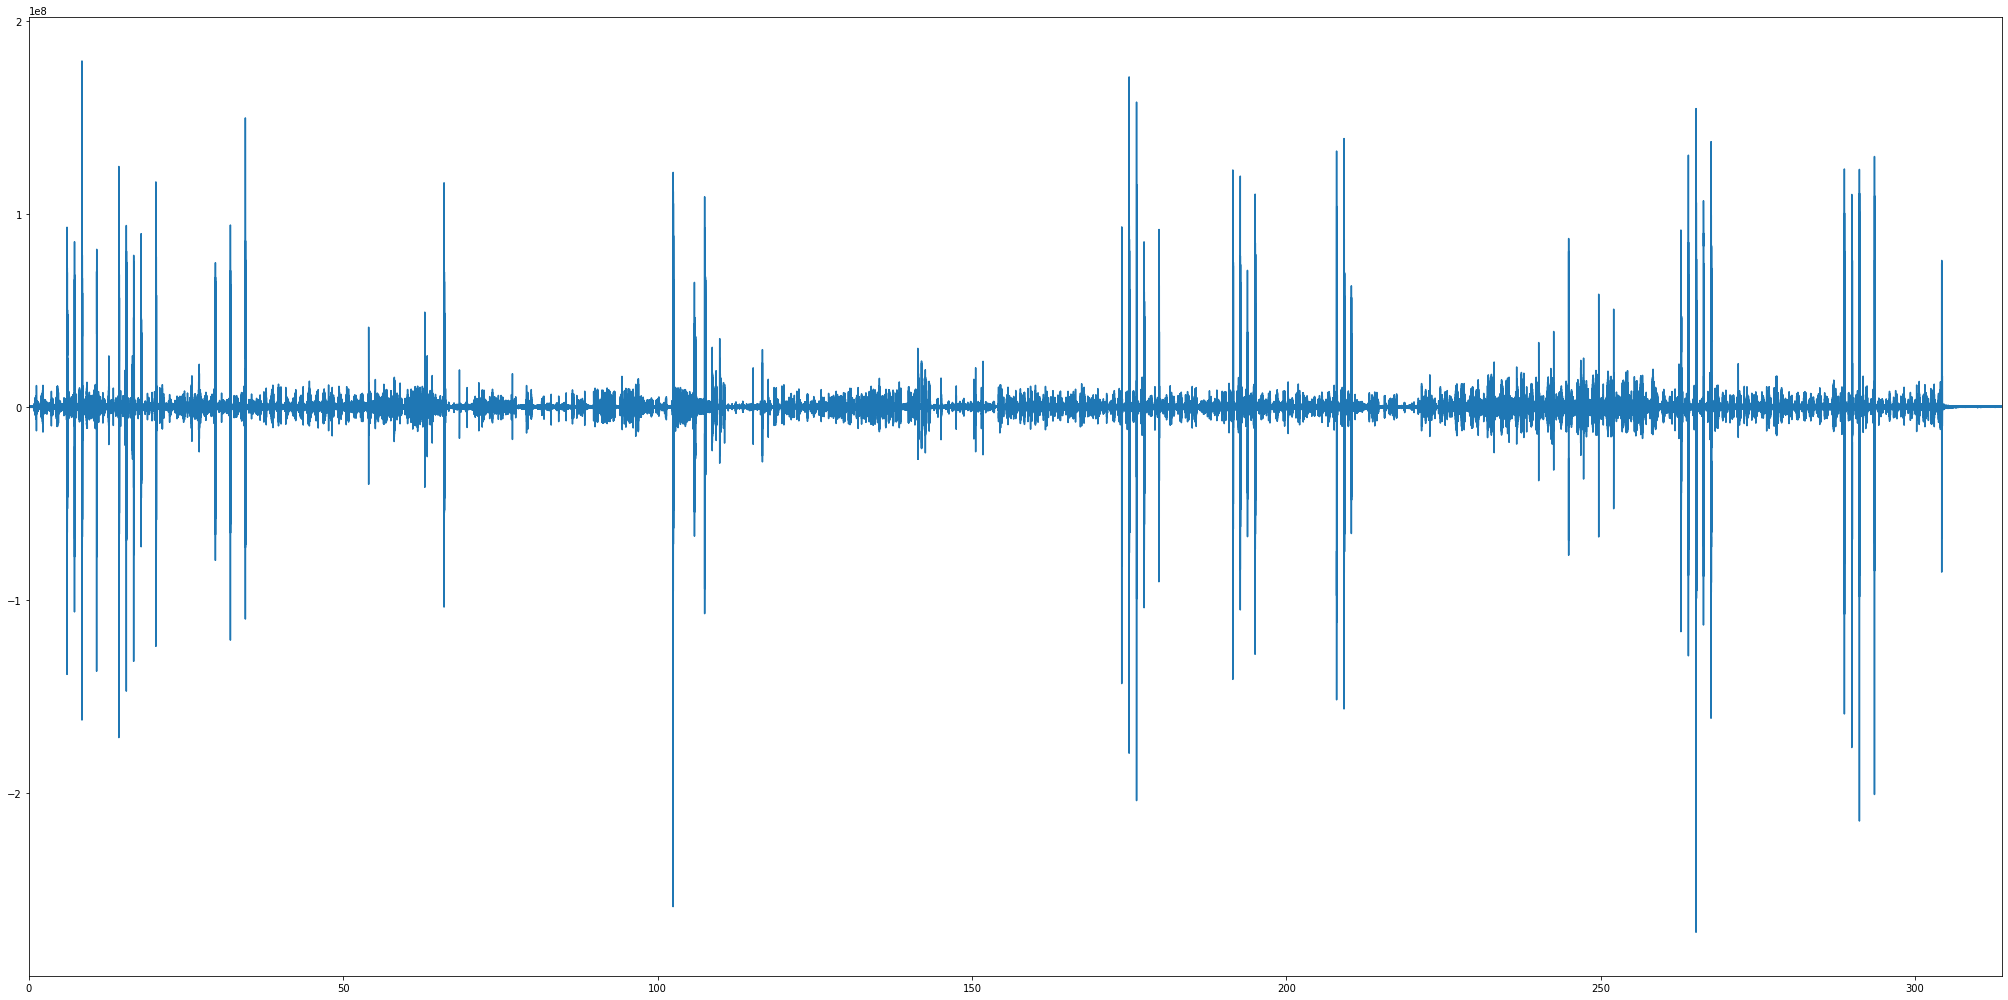

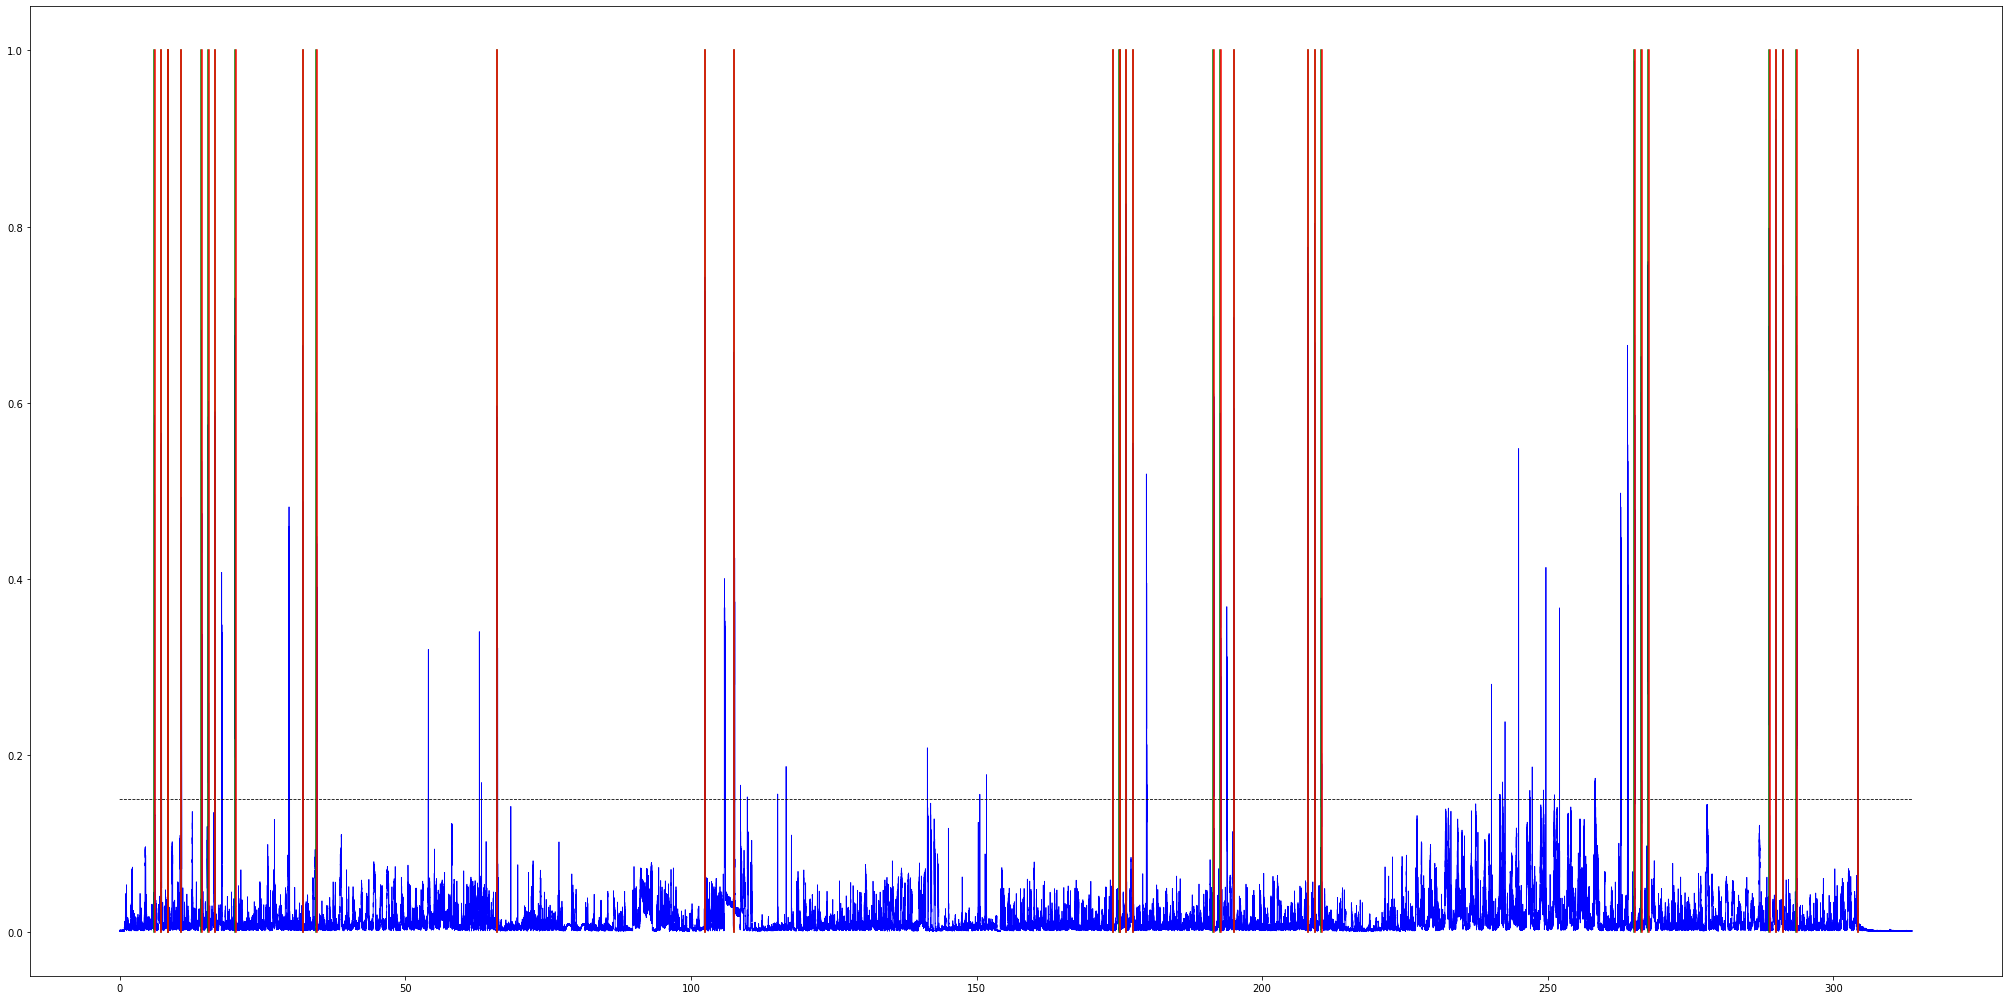


 Now processing file C:\Users\admin\Project\MIDIconversion_marovany\capteurs\03-G3-140709_1628.wav
Guessed note : 55


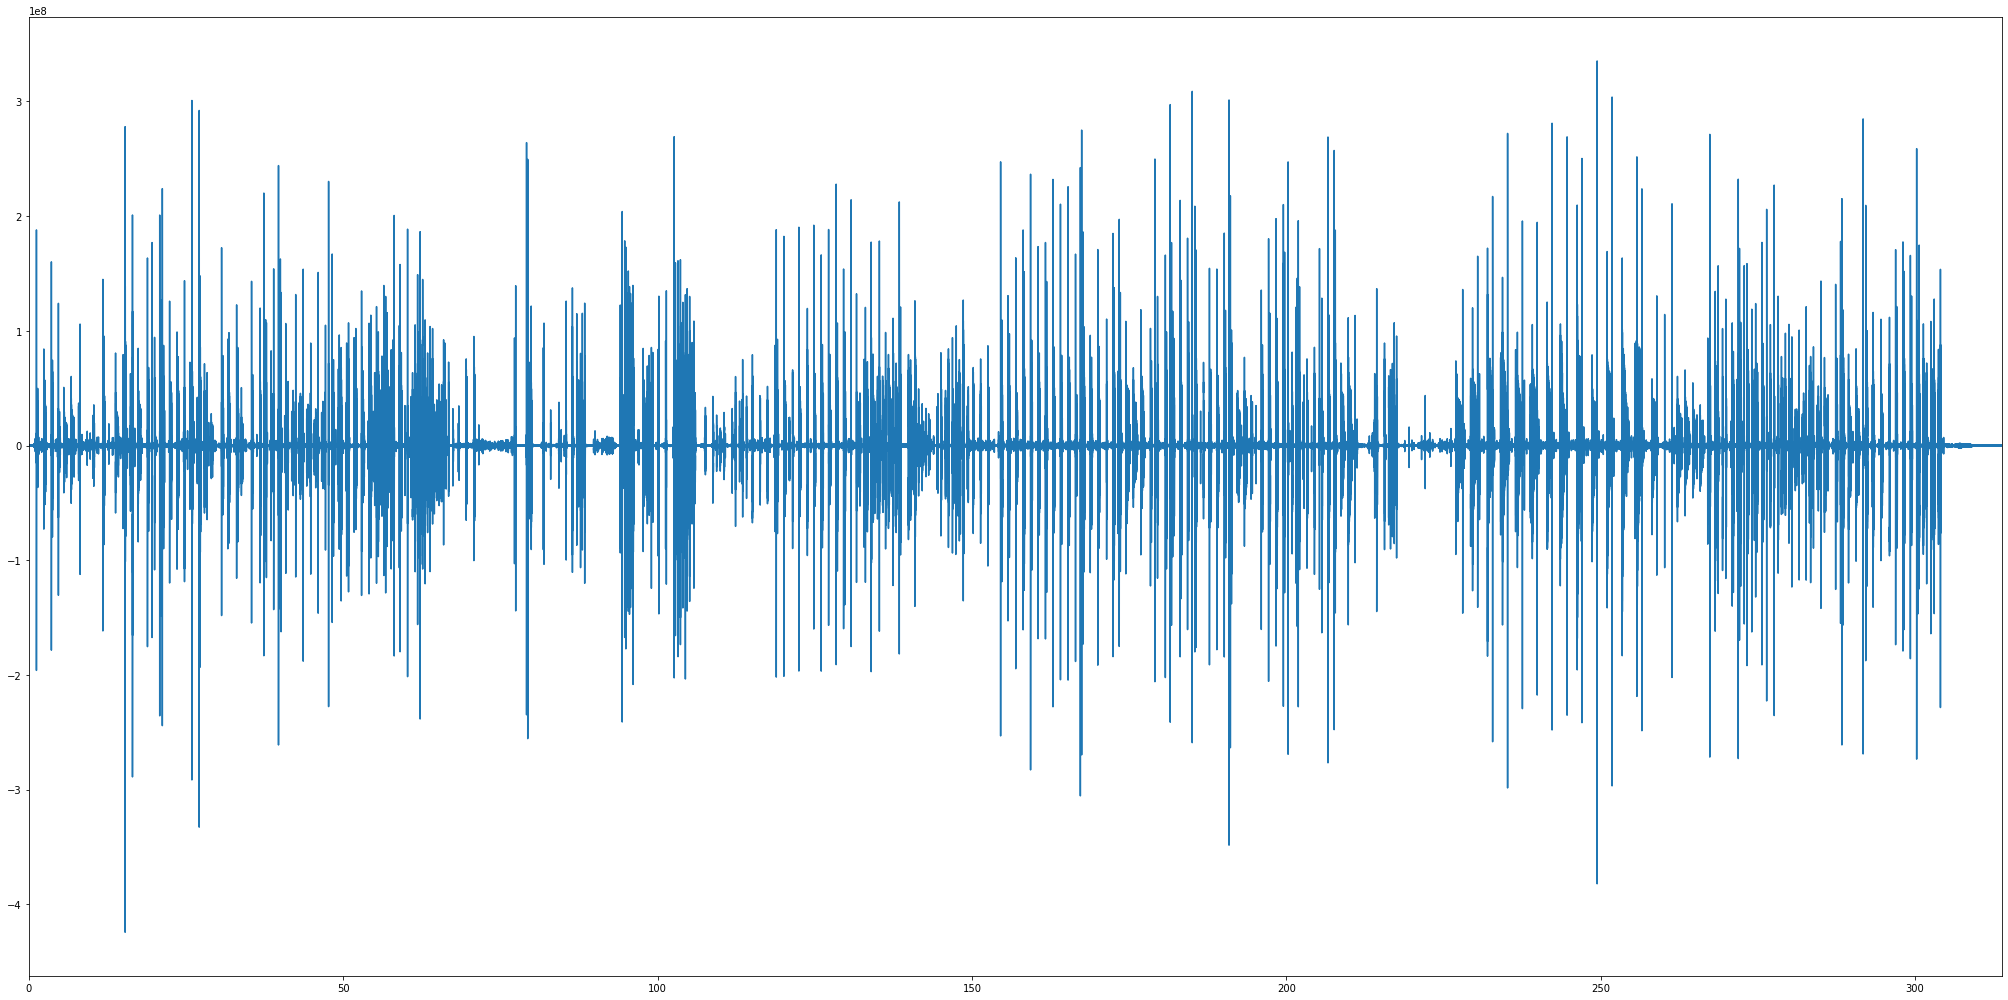

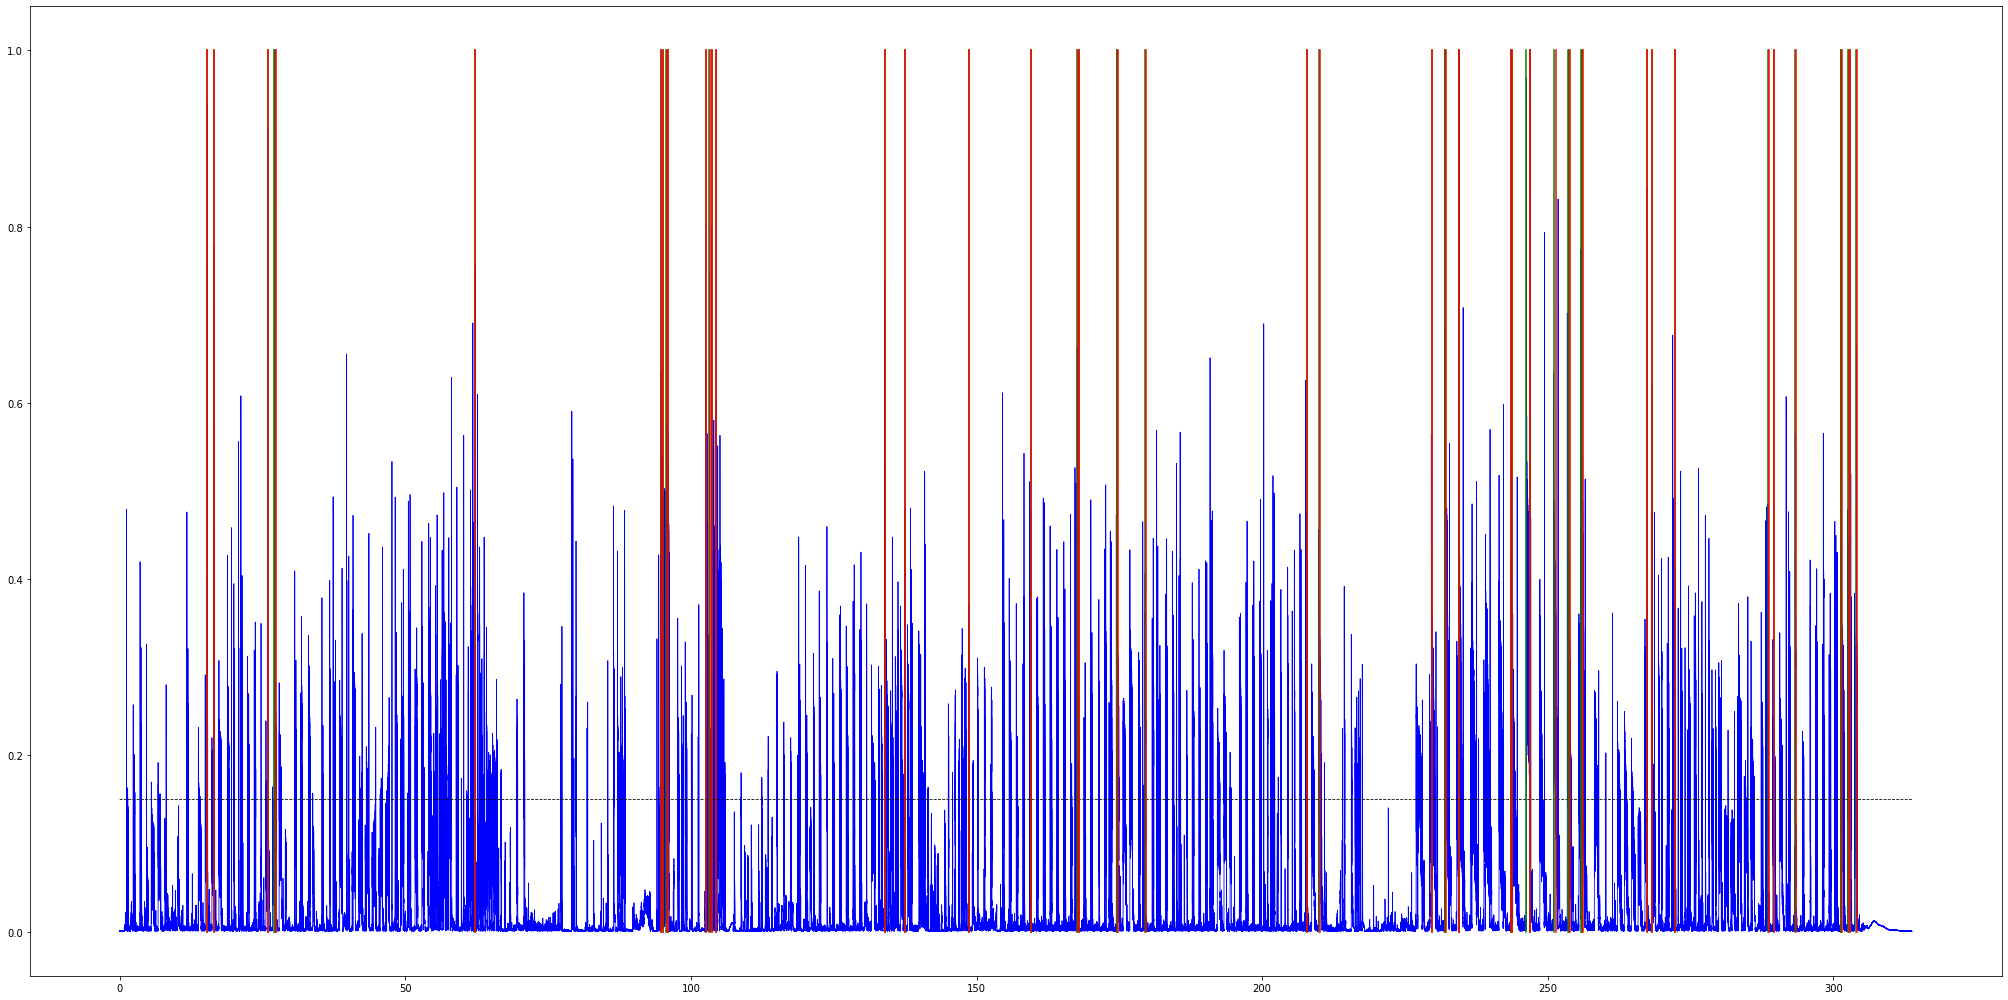


 Now processing file C:\Users\admin\Project\MIDIconversion_marovany\capteurs\04-G4-140709_1628.wav


KeyboardInterrupt: 

In [5]:
start = time.time()

do_plot = True
verbose = True

## Some user parameters 
duration_for_analysis = 20 # duration of each wav that is analyzed
filter_timescale = 80 # parameter for note segmentation : median filter lenghth, the larger the smoother the signal envelop
threshold = 0.15 # parameter for note segmentation : energy level above which a note occurrence is detected
min_duration = 0.03 # parameter for note segmentation : minimal duration below which a note occurrence is discarded 

wav_list = glob.glob(os.getcwd() + '/*wav')
print(wav_list)

## Create a PrettyMIDI object
banjo_MIDI = pretty_midi.PrettyMIDI()
# Create an Instrument instance for a banjo instrument
banjo_program = pretty_midi.instrument_name_to_program('Banjo')
banjo_instru = pretty_midi.Instrument(program=banjo_program)
# Add the banjo instrument to the PrettyMIDI object
banjo_MIDI.instruments.append(banjo_instru)

## Instatiate Marovany note dictionary
note_list = create_note_list()
fig_size = [28, 14]


# --------------------------------
## Start audio analysis
for wav_file in wav_list:
    if verbose:
        print('\n Now processing file', wav_file)
    # audio data loading
    y, sr = librosa.load(wav_file, offset=0, duration=duration_for_analysis)
#     sr, y = wavfile.read(wav_file)
    amplitude_envelope = get_amplitude_envelope(y=y, filter_timescale=filter_timescale)
    decal = get_decal(amplitude_envelope, threshold)
    midi_note = get_note_guessed_from_fname(note_list=note_list, fname=wav_file)
    print("Guessed note :", midi_note)
    time_series_fig = get_time_series_fig(fig_size=fig_size, y=y, samp_rate=sr)
#     time_series_fig.show()
    pitch_detection_fig = get_pitch_detection_fig(fig_size=fig_size, ampl_envel=amplitude_envelope, threshold=threshold, min_duration=min_duration, instru=banjo_instru, decal=decal, midi_note=midi_note)
#     pitch_detection_fig.show()
    plt.show()

# write_midi_file(banjo_MIDI, os.getcwd() + "marovany.mid")
# multitrack_plot = get_multitrack_plot(os.getcwd() + "marovany.mid")

end = time.time()
print('time of analysis:', end-start)
